# 3 Pre-Processing<a id='3_Pre-Processing'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Pre-Processing](#3_Pre-Processing)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load Data](#3.4_Load_Data)
  * [3.5 Drop Unused Columns](#3.5_DropColumns)
  * [3.6 Create Age Categories](#3.6_age_categories)  
  * [3.7 Make Dummy Variables](#3.7_MakeDummies)
  * [3.8 Train/Test Split](#3.8_Train/Test_Split)

## 3.2 Introduction<a id='3.1_Contents'></a>

This notebook provides code to load data from a previous notebook (data wrangling) and (1) drop columns not used in modeling (2) create age categories from ages (3) create dummy variables from all columns including target variable (4) split data into train and test sets.

Note that since all variables are categorical and turned into dummy variables all values are 0 or 1. Therefore, there is no need for scaling values.

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

## 3.4 Load Data<a id='3.4_Load_Data'></a>

In [2]:
df = pd.read_csv('nonvoters2_wrangled.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Columns: 119 entries, Unnamed: 0 to voter_category
dtypes: float64(23), int64(91), object(5)
memory usage: 5.3+ MB


In [4]:
df.head()

,Unnamed: 0,RespId,weight,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,...,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
0,0,470001,0.7516,1,1,2,4,1,4,2,...,2,NaN,1.0,NaN,73,College,White,Female,$75-125k,always
1,1,470002,1.0267,1,2,2,3,1,1,2,...,3,NaN,NaN,1.0,90,College,White,Female,$125k or more,always
2,2,470003,1.0844,1,1,2,2,1,1,2,...,2,NaN,2.0,NaN,53,College,White,Male,$125k or more,sporadic
3,3,470007,0.6817,1,1,1,3,1,1,1,...,2,NaN,1.0,NaN,58,Some college,Black,Female,$40-75k,sporadic
4,4,480008,0.9910,1,1,-1,1,1,1,1,...,1,-1.0,NaN,NaN,81,High school or less,White,Male,$40-75k,always


## 3.5 Drop Unused Columns<a id='3.5_DropColumns'> </a>

In [5]:
df = df.drop(['Unnamed: 0', 'RespId', 'weight'], axis=1)
df.columns

Index(['Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9',
       'Q2_10',
       ...
       'Q30', 'Q31', 'Q32', 'Q33', 'ppage', 'educ', 'race', 'gender',
       'income_cat', 'voter_category'],
      dtype='object', length=116)

## 3.6 Create Age Categories<a id='3.6_age_categories'> </a>

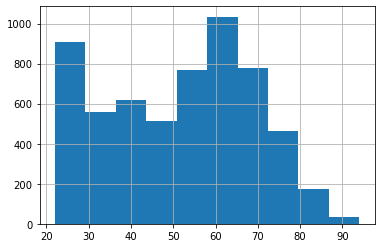

In [6]:
df.ppage.hist()
plt.show()


In [7]:
# Create age categories in df

df = df.astype({'ppage':'int64'})
for i in range(len(df['ppage'])):
    if df.loc[i,'ppage']>=18 and df.loc[i,'ppage']<=25:
        df.loc[i,'age']='18-25'
    elif df.loc[i,'ppage']<=35:
        df.loc[i,'age']='26-35'
    elif df.loc[i,'ppage']<=45:
        df.loc[i,'age']='36-45'
    elif df.loc[i,'ppage']<=55:
        df.loc[i,'age']='46-55'
    elif df.loc[i,'ppage']<=65:
        df.loc[i,'age']='56-65'
    else:
        df.loc[i,'age']='66+'
df = df.drop(['ppage'],axis=1).astype(object)

In [8]:
df.columns

Index(['Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9',
       'Q2_10',
       ...
       'Q30', 'Q31', 'Q32', 'Q33', 'educ', 'race', 'gender', 'income_cat',
       'voter_category', 'age'],
      dtype='object', length=116)

## 3.7 Make Dummy Variables<a id='3.7_MakeDummies'> </a>

In [9]:
df_dum = pd.get_dummies(df, drop_first=True)

In [10]:
df.dtypes

Q2_1              object
Q2_2              object
Q2_3              object
Q2_4              object
Q2_5              object
                   ...  
race              object
gender            object
income_cat        object
voter_category    object
age               object
Length: 116, dtype: object

In [11]:
df_dum.head()

,Q2_1_1,Q2_1_2,Q2_1_3,Q2_1_4,Q2_2_1,Q2_2_2,Q2_2_3,Q2_2_4,Q2_3_1,Q2_3_2,...,income_cat_$40-75k,income_cat_$75-125k,income_cat_Less than $40k,voter_category_rarely/never,voter_category_sporadic,age_26-35,age_36-45,age_46-55,age_56-65,age_66+
0,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [12]:
# check for duplicate rows
duplicateRowsDF = df_dum[df_dum.duplicated()]
duplicateRowsDF

,Q2_1_1,Q2_1_2,Q2_1_3,Q2_1_4,Q2_2_1,Q2_2_2,Q2_2_3,Q2_2_4,Q2_3_1,Q2_3_2,...,income_cat_$40-75k,income_cat_$75-125k,income_cat_Less than $40k,voter_category_rarely/never,voter_category_sporadic,age_26-35,age_36-45,age_46-55,age_56-65,age_66+


## 3.8 Train/Test Split<a id='3.8_Train/Test_Split'> </a>

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# make X and y from df_dum

X = df_dum.drop(['voter_category_sporadic','voter_category_rarely/never'], axis=1)
y = df_dum['voter_category_rarely/never']

# train test split using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
X_train.shape

(4668, 310)